In [7]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Author: Andrew Tarzia

Date Created: 10 Oct 2018

Distributed under the terms of the MIT License.

# Notebook for plotting the results of reaction system screening

In [8]:
import pandas as pd
%aimport rdkit_functions
%aimport ellipsoid
%aimport plotting

In [9]:
import sys
from rxn_syst import reaction, yield_rxn_syst
from molecule import molecule
import glob
from plotting import *

DB2do = 'biomin'
#DB2do = 'new'

if DB2do == 'biomin':
    search_output_dir = '/home/atarzia/psp/screening_results/biomin_search/'
    plot_suffix = 'biomin'
elif DB2do == 'new':
    search_output_dir = '/home/atarzia/psp/screening_results/new_reactions/'
    plot_suffix = 'new'
molecule_db_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'
molecules = glob.glob(molecule_db_dir+'ATRS_*.gpkl')
print('------------------------------------------------')
print('Doing DB:', DB2do)
print('------------------------------------------------')

------------------------------------------------
Doing DB: biomin
------------------------------------------------


In [10]:
# parameters
pI_thresh = 6
size_thresh = 4.2  # angstroms
print('settings:')
print('    pI threshold:', pI_thresh)
print('    Diffusion threshold:', size_thresh, 'Angstrom')

settings:
    pI threshold: 6
    Diffusion threshold: 4.2 Angstrom


## Extract all RS data into DataFrame for faster plotting

In [15]:
rs.__dict__

{'DB': 'SABIO',
 'DB_ID': 6101,
 'EC': '1.1.3.4',
 'UniprotID': 'P81156',
 'all_fit': False,
 'components': [<molecule.molecule at 0x7f24e6ceccf8>,
 'delta_comp': 30.0,
 'delta_sa': 0.1523649248273582,
 'max_XlogP': -0.9,
 'max_comp_size': 7.308,
 'max_logP': 0.067,
 'min_XlogP': -2.6,
 'min_logP': -3.2214000000000005,
 'mol_collected': True,
 'organism': 'Penicillium amagasakiense',
 'p_max_comp': 181.0,
 'p_max_sa': 3.7478102026472886,
 'pkl': 'sRS-1_1_3_4-SABIO-6101.gpkl',
 'rID': '1691',
 'r_max_comp': 151.0,
 'r_max_sa': 3.5954452778199304,
 'req_mod': None,
 'seed_MOF': None,
 'skip_rxn': False}

In [14]:
generator = yield_rxn_syst(search_output_dir)

data_list = []
count = 0
for rs in generator:
    count += 1
    if rs.skip_rxn is True:
        continue
    print('------', count, '------')
    row = [rs.pkl, rs.EC, rs.max_comp_size, rs.max_XlogP, rs.min_XlogP,
           rs.max_logP, rs.min_logP, rs.r_max_comp, rs.p_max_comp,
           rs.r_max_sa, rs.p_max_sa,
           rs.delta_comp, rs.delta_sa, rs.A_index, rs.GRAVY, rs.I_index, rs.pI]
    data_list.append(row)

------ 2 ------


AttributeError: 'reaction' object has no attribute 'A_index'

In [60]:
data_DF = pd.DataFrame(data_list,columns=['pkl', 'EC', 
                             'max_comp_size',
                             'max_XlogP', 'min_XlogP',
                             'max_logP', 'min_logP',
                             
                             'r_max_comp', 'p_max_comp',
                             'r_max_sa', 'p_max_sa',
                             'delta_comp', 'delta_sa',
                             'A_index',  'GRAVY',
                             'I_index', 'pI'])

In [61]:
# save DF to CSV file
data_DF.to_csv(search_output_dir+'output_data.csv', index=False)

In [5]:
data_DF = pd.read_csv(search_output_dir+'output_data.csv')

## Plotting

### RS property plots

In [81]:
def rs_size_vs_SA_vs_logP(output_dir, size_thresh, DF, plot_suffix):
    """Plot maximum component size of a reaction vs. logP with synth access as
    3rd variable.

    Plot max_logP => most hydroXX component.

    """
    HRP_logP = 0.017
    fig, ax = plt.subplots(figsize=(8, 5))
    new_cmap = define_plot_cmap(fig, ax, mid_point=0.5, cmap=cm.RdBu,
                                ticks=[0, 0.25, 0.5, 0.75, 1],
                                labels=['-10', '-5', '0', '5', '10'],
                                cmap_label='$\Delta$ synthetic accessibility')
    # iterate over reaction system files
    M = 'o'
    E = 'k'
    #DF1 = DF[DF.delta_sa is not None]
    ax.scatter(DF.max_logP,
               DF.max_comp_size,
               c=new_cmap(abs((-10-DF.delta_sa))/20),
               edgecolors=E,
               marker=M,
               alpha=1.0,
               s=100)

    ax.axhline(y=size_thresh, c='gray', linestyle='--')
    ax.axvline(x=HRP_logP, c='gray', linestyle='--')
    define_standard_plot(ax,
                         title='',
                         xtitle='logP of most hydrophobic component',
                         ytitle='diameter of largest component [$\mathrm{\AA}$]',
                         xlim=(-6, 6),
                         ylim=(0, 15))
    fig.tight_layout()
    fig.savefig(output_dir+"size_SA_logP_"+plot_suffix+".pdf", dpi=720,
                bbox_inches='tight')

/home/atarzia/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


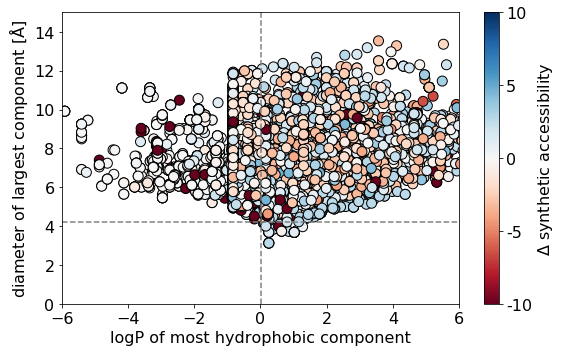

In [82]:
# plot max component size vs synthetic accessibility vs logP
rs_size_vs_SA_vs_logP(output_dir=search_output_dir,
                      size_thresh=size_thresh,
                      DF=data_DF,
                      plot_suffix=plot_suffix)

AttributeError: 'reaction' object has no attribute 'delta_sa'

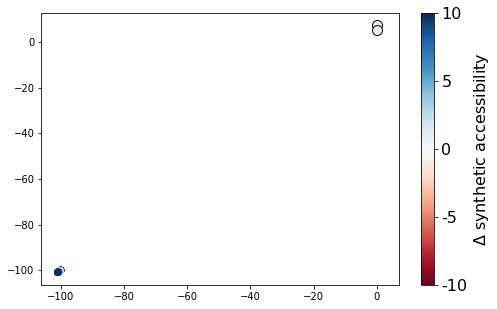

In [16]:
# plot max component size vs synthetic accessibility vs logP
rs_size_vs_SA_vs_logP(output_dir=search_output_dir,
                      size_thresh=size_thresh,
                      generator=yield_rxn_syst(search_output_dir),
                      plot_suffix=plot_suffix)

AttributeError: 'reaction' object has no attribute 'delta_comp'

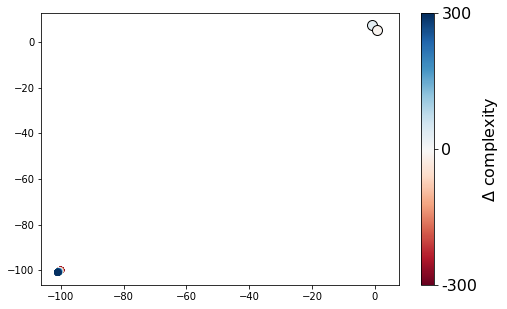

In [17]:
# plot max component size vs complexity vs XlogP
rs_size_vs_complexity_vs_XlogP(output_dir=search_output_dir,
                               size_thresh=size_thresh,
                               generator=yield_rxn_syst(search_output_dir),
                               plot_suffix=plot_suffix)

error loading (the exception needs to be determined):
/home/atarzia/psp/screening_results/biomin_search/sRS-1_11_1_6-SABIO-44715.gpkl


SystemExit: 

/home/atarzia/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


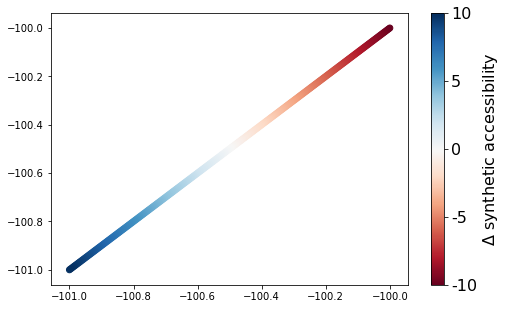

In [18]:
# plot max component size vs SA score vs XlogP vs aliphatic index
rs_size_vs_SA_vs_XlogP_vs_aindex(output_dir=search_output_dir,
                                 size_thresh=size_thresh,
                                 generator=yield_rxn_syst(search_output_dir),
                                 plot_suffix=plot_suffix)

In [21]:
generator = yield_rxn_syst(search_output_dir)
# collect rxn syst data
max_sizes = []
reaction_reported = []
# also plot the number of new reactions with pI < thresh
# max_sizes_pI = []
# iterate over reaction system files
for rs in generator:
    if rs.skip_rxn is True:
        continue
    unique, reaction_reported = check_rxn_unique(reaction_reported, rs)
    if unique is False:
        continue
    try:
        if rs.max_comp_size > 0:
            max_sizes.append(rs.max_comp_size)
            # if rs.seed_MOF is True:
            #     max_sizes_pI.append(rs.max_comp_size)
    except AttributeError:
        pass
    
max_sizes = np.asarray(max_sizes)
# max_sizes_pI = np.asarray(max_sizes_pI)
counts = []
# counts_pI = []
threshs = np.arange(0.1, 21, 0.5)
for thr in threshs:
    count_above = len(max_sizes[max_sizes < thr])
    counts.append(count_above)
    # count_above_pI = len(max_sizes_pI[max_sizes_pI < thr])
    # counts_pI.append(count_above_pI)

NameError: name 'output_dir' is not defined

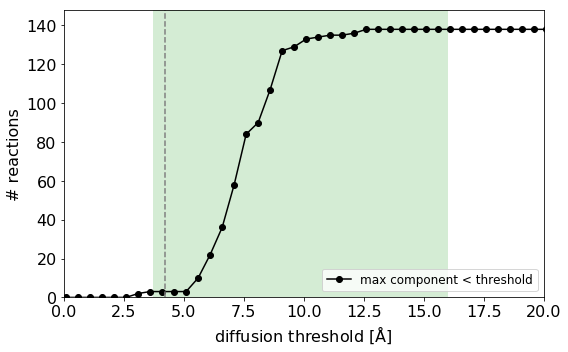

In [22]:
# do plot
fig, ax = plt.subplots(figsize=(8, 5))
max_sizes = []
reaction_reported = []


ax.plot(threshs, counts, alpha=1.0,
        label='max component < threshold',
        color='k', marker='o')

ax.legend(loc=4, fontsize=12)

ax.axvline(x=size_thresh, c='gray', linestyle='--')

# plot possible region of ZIF pore limiting diameters from
# Materials Project
ax.axvspan(3.7, 16, facecolor='#2ca02c', alpha=0.2)

define_standard_plot(ax,
                     title='',
                     xtitle='diffusion threshold [$\mathrm{\AA}$]',
                     ytitle='# reactions',
                     xlim=(0, 20),
                     ylim=(0, max(counts)+10))
fig.tight_layout()
fig.savefig(output_dir+"size_threshold_"+plot_suffix+".pdf", dpi=720,
            bbox_inches='tight')

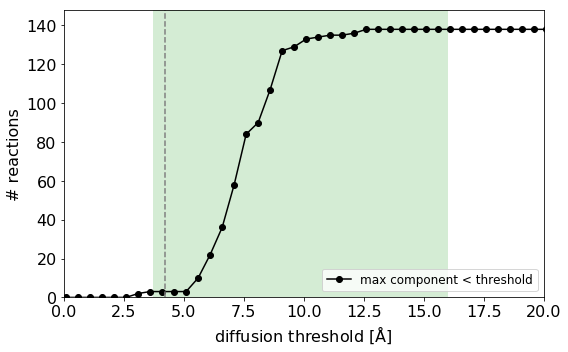

In [23]:
# plot number of new reactions as a function of size threshold
rs_number_rxns_vs_size(output_dir=search_output_dir,
                       size_thresh=size_thresh,
                       generator=yield_rxn_syst(search_output_dir),
                       plot_suffix=plot_suffix)

### RS distributions

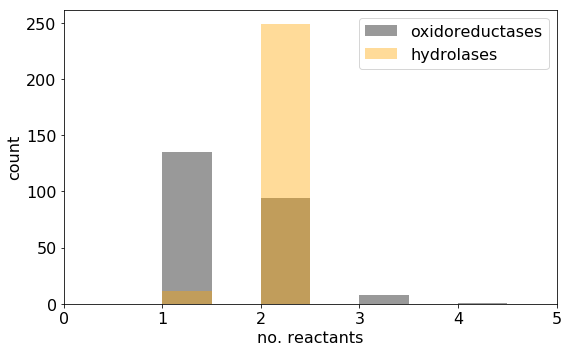

In [24]:
# plot a distribution of the number of reactnts in each reaction system
rs_dist_no_reactants(output_dir=search_output_dir,
                     generator=yield_rxn_syst(search_output_dir),
                     plot_suffix=plot_suffix)

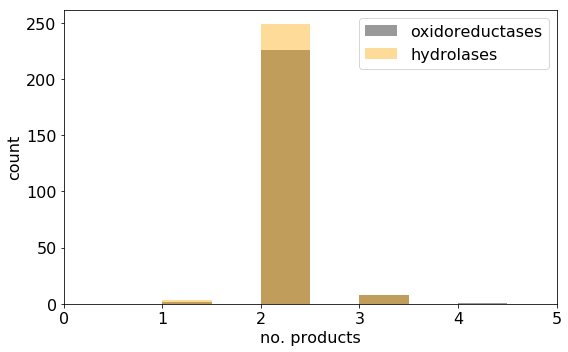

In [25]:
# plot a distribution of the number of products in each reaction system
rs_dist_no_products(output_dir=search_output_dir,
                    generator=yield_rxn_syst(search_output_dir),
                    plot_suffix=plot_suffix)

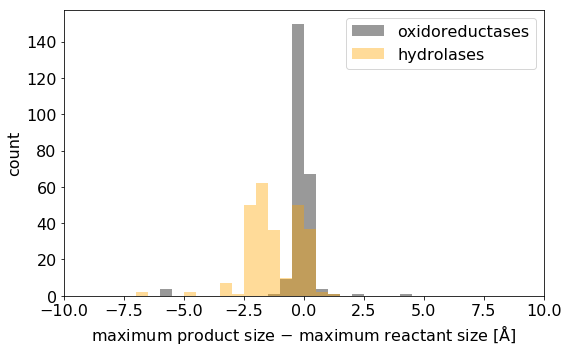

In [26]:
# plot a distribution of the change in molecule size due to reaction
rs_dist_delta_size(output_dir=search_output_dir,
                   generator=yield_rxn_syst(search_output_dir),
                   plot_suffix=plot_suffix)

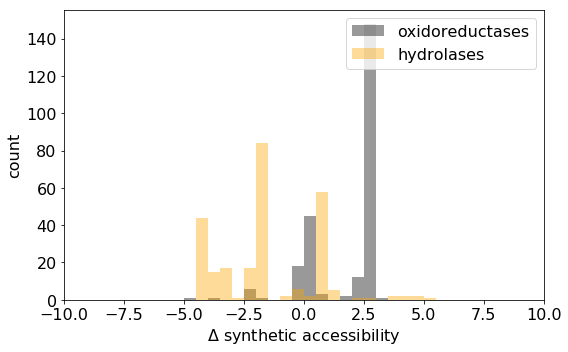

In [27]:
# plot a distribution of the change in synthetic accesibility
rs_dist_delta_SA(output_dir=search_output_dir,
                 generator=yield_rxn_syst(search_output_dir),
                 plot_suffix=plot_suffix)

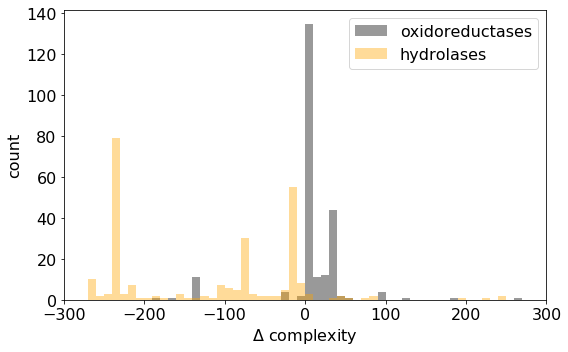

In [28]:
# plot a distribution of the change in complexity
rs_dist_delta_complexity(output_dir=search_output_dir,
                         generator=yield_rxn_syst(search_output_dir),
                         plot_suffix=plot_suffix)

#### plot distributions of protein sequence properties

In [ ]:
rs_dist_GRAVY(output_dir=search_output_dir,
              generator=yield_rxn_syst(search_output_dir),
              plot_suffix=plot_suffix)

In [ ]:
rs_dist_I_index(output_dir=search_output_dir,
                generator=yield_rxn_syst(search_output_dir),
                plot_suffix=plot_suffix)

In [ ]:
rs_dist_A_index(output_dir=search_output_dir,
                generator=yield_rxn_syst(search_output_dir),
                plot_suffix=plot_suffix)

In [ ]:
rs_dist_pI(output_dir=search_output_dir,
           generator=yield_rxn_syst(search_output_dir),
           plot_suffix=plot_suffix)

### Molecule property plots

### Molecule distributions